####  Product Sales Data Analysis


### Content:
1 - Importing libraries <a href="#1">@</a> <br>
2 - Load dataset <a href="#2">@</a> <br>
3 - Check null or empty values <a href="#3">@</a> <br>
4 - Which are the most order product? <a href="#4">@</a> <br>
5 - Which are the most profit product? <a href="#5">@</a> <br>
6 - which are the most selling product? <a href="#6">@</a> <br>
7 - Which is the best profit product in each region? <a href="#7">@</a> <br>
8 - Which is the best-selling and profitable product in each region? <a href="#8">@</a> <br>
9 - Which is the best-categories have best selling product in each country? <a href="#9">@</a> <br>
10 - Which is the best-category have best profitable product in each country? <a href="#10">@</a> <br>
11 - Which is the best-category have best selling and profitable product in each country? <a href="#11">@</a> <br>
12 - What category sold the most? <a href="#12">@</a> <br>
13 - Which are the most profitable category? <a href="#13">@</a> <br>
14 - Total sales values by category and subcategory <a href="#14">@</a> <br>
15 - Which are the most selling products in subcategory? <a href="#15">@</a> <br>
16 - Which customer segments are the most profitable? <a href="#16">@</a> <br>
17 - What market sold the most products? <a href="#17">@</a> <br>
18 - Which are the Top 10 country by sales? <a href="#18">@</a> <br>

<label id="1"> Importing libraries </label>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<label id="2"> Load dataset </label>

In [5]:
data = pd.read_excel("superstore_sales.xlsx")
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
data.shape

(51290, 21)

<label id="3"> Check null or empty values </label>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [8]:
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [9]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [12]:
data.ship_mode.value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [14]:
data.segment.value_counts()

segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

In [19]:
data.market.unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [20]:
data.region.unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'South', 'Caribbean', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [21]:
data.category.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [22]:
data.sub_category.unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [24]:
data.order_priority.unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

<label id="4"> Which are the most order product? </label>

In [48]:
orders = data.groupby("product_name").agg({"quantity":"sum"}).sort_values("quantity",ascending=False)[:5]
orders

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Staples'),
  Text(1, 0, 'Cardinal Index Tab, Clear'),
  Text(2, 0, 'Eldon File Cart, Single Width'),
  Text(3, 0, 'Rogers File Cart, Single Width'),
  Text(4, 0, 'Sanford Pencil Sharpener, Water Color')])

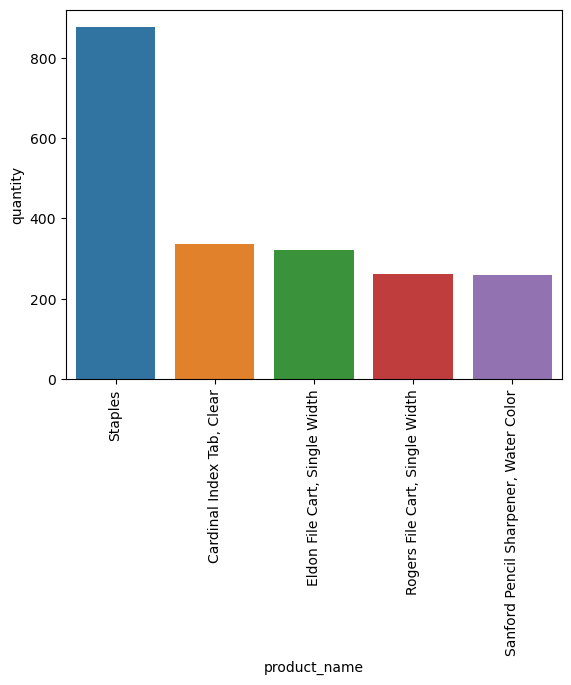

In [60]:
sns.barplot(x="product_name", y="quantity", data=orders.reset_index(), hue="product_name")
plt.xticks(rotation = 'vertical')

<label id="5"> Which are the most profit product? </label>

In [61]:
profits = data.groupby("product_name").agg({"profit":"sum"}).sort_values("profit", ascending=False)[:5]
profits

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730


Text(0.5, 1.0, 'the top 5 most profit product')

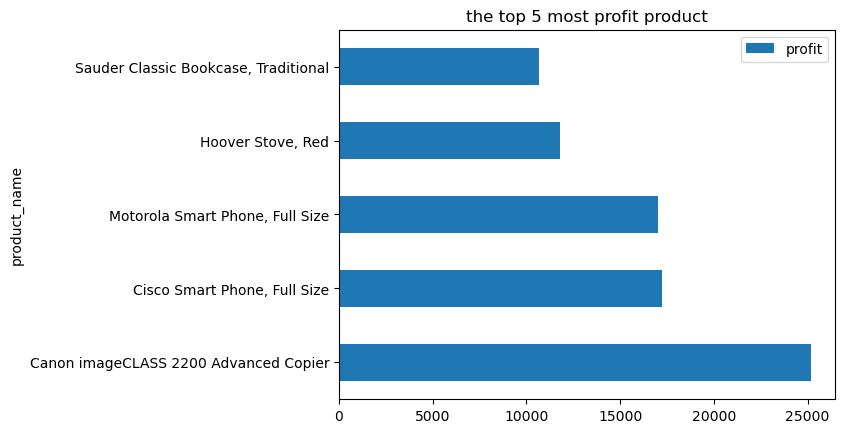

In [70]:
profits.plot(kind="barh")
plt.title("the top 5 most profit product")

<label id="6"> which are the most selling product? </label>

In [71]:
top_sales = data.groupby("product_name").agg({"sales":"sum"}).sort_values("sales",ascending=False)[:5]
top_sales

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240


Text(0.5, 1.0, 'top 5 most selling product')

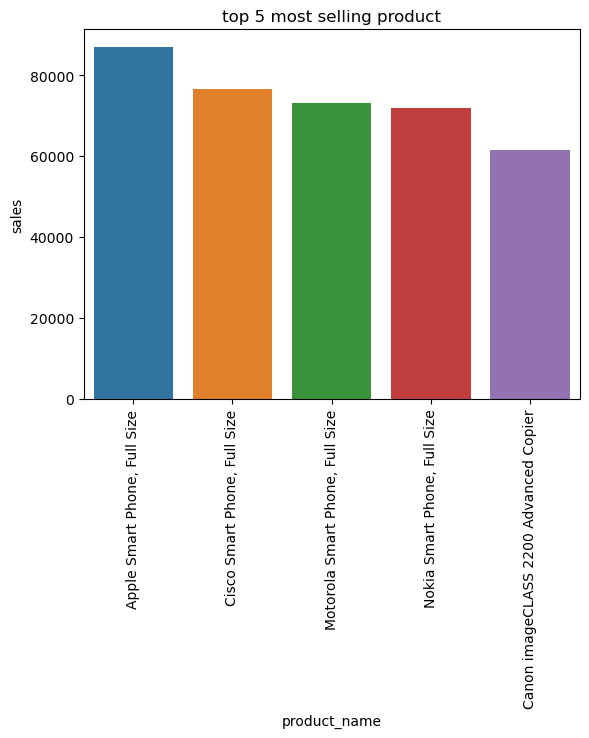

In [80]:
sns.barplot(data=top_sales, x="product_name", y="sales", hue="product_name")
plt.xticks(rotation="vertical")
plt.title("top 5 most selling product")

<label id="7">Which is the best profit product in each region?</label>

In [81]:
region_profit = data.groupby(["product_name", "region"]).agg({"profit":"sum"}).sort_values(["profit"], ascending=False)[:5]
region_profit

profit
product_name                          region             
Canon imageCLASS 2200 Advanced Copier East     10079.9712
                                      Central   8399.9760
                                      West      6719.9808
Hoover Stove, Red                     South     6537.0600
Nokia Smart Phone, Full Size          North     6319.7100

Text(0.5, 1.0, 'top 5 most profit product for each region')

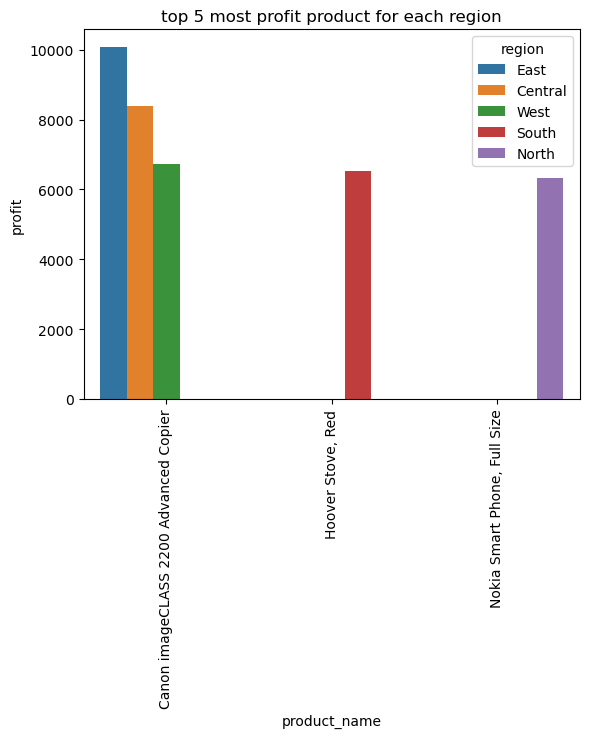

In [84]:
sns.barplot(data=region_profit, x="product_name", y="profit", hue="region")
plt.xticks(rotation="vertical")
plt.title("top 5 most profit product for each region")

<label id="8">Which is the best-selling and profitable product in each region?</label>

In [85]:
sales_profit = data.groupby(["product_name", "region"]).agg({"sales":"sum", "profit":"sum"}).sort_values(["sales", "profit"], ascending=False)[:5]
sales_profit

,,sales,profit
product_name,region,,
Canon imageCLASS 2200 Advanced Copier,East,30099.9140,10079.9712
"Nokia Smart Phone, Full Size",North,24454.8900,6319.7100
Cisco TelePresence System EX90 Videoconferencing Unit,South,22638.4800,-1811.0784
"Nokia Smart Phone, Full Size",Central,20479.6255,5174.5455
Canon imageCLASS 2200 Advanced Copier,Central,17499.9500,8399.9760


C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_8180\3824918041.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_8180\3824918041.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


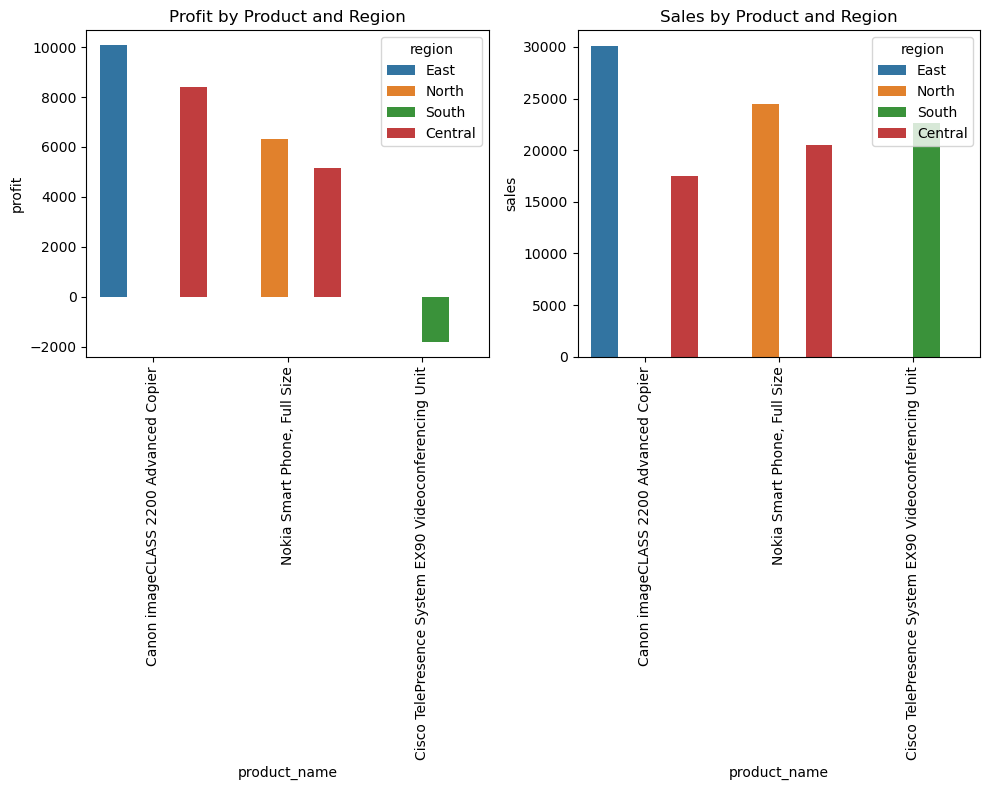

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))
sns.barplot(data=sales_profit, x="product_name", y="profit", hue="region", ax=ax[0])
sns.barplot(data=sales_profit, x="product_name", y="sales", hue="region", ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title("Profit by Product and Region")
ax[1].set_title("Sales by Product and Region")
plt.tight_layout()
plt.show()

<label id="9">Which is the best-categories have best selling product in each country?</label>

In [151]:
top_sales_country = data.groupby(["country", "category"]).agg({"sales":"sum"}).sort_values("sales", ascending=False)
top_sales_country

sales
country           category                    
United States     Technology       836154.0330
                  Furniture        741999.7953
                  Office Supplies  719047.0320
Australia         Technology       340212.4440
                  Furniture        339239.8680
...                                        ...
Bahrain           Office Supplies      44.1600
Equatorial Guinea Office Supplies      26.2200
Armenia           Office Supplies      20.4900
Eritrea           Office Supplies      17.8200
Tajikistan        Office Supplies       7.4520

[418 rows x 1 columns]

<label id="10">Which is the best-category have best profitable product in each country?</label>

In [152]:
top_profits_country = data.groupby(["country", "category"]).agg({"profit":"sum"}).sort_values("profit", ascending=False)
top_profits_country

profit
country       category                     
United States Technology       145454.94810
              Office Supplies  122490.80080
China         Technology        64845.10500
India         Technology        56092.65000
Mexico        Technology        53754.03752
...                                     ...
Nigeria       Office Supplies  -27087.84000
              Technology       -28430.52600
Turkey        Furniture        -30324.19800
              Office Supplies  -33550.95600
              Technology       -34572.07800

[418 rows x 1 columns]

<label id="11">Which is the best-category have best selling and profitable product in each country?</label>

In [162]:
top_selling_profits_country = data.groupby(["country", "category"]).agg({"sales":"sum","profit":"sum"}).sort_values(["sales","profit"], ascending=False)
top_selling_profits_country

sales       profit
country           category                                 
United States     Technology       836154.0330  145454.9481
                  Furniture        741999.7953   18451.2728
                  Office Supplies  719047.0320  122490.8008
Australia         Technology       340212.4440   47727.5040
                  Furniture        339239.8680   26276.3680
...                                        ...          ...
Bahrain           Office Supplies      44.1600       6.6000
Equatorial Guinea Office Supplies      26.2200       2.2200
Armenia           Office Supplies      20.4900       2.8500
Eritrea           Office Supplies      17.8200       3.1800
Tajikistan        Office Supplies       7.4520     -11.8380

[418 rows x 2 columns]

<label id="12">What category sold the most?<label>

In [166]:
data.groupby(["country"]).agg({"sales":"sum"})

,sales
country,
Afghanistan,21673.32000
Albania,3888.12000
Algeria,36091.59000
Angola,25554.00000
Argentina,57511.78328
...,...
Venezuela,26587.82956
Vietnam,65800.19940
Yemen,2465.71200


<label id="13">Which are the most profitable category?</label>

In [168]:
profitable_category = pd.DataFrame(data.groupby(['category']).agg({"profit":"sum"}))
profitable_category.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_category

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


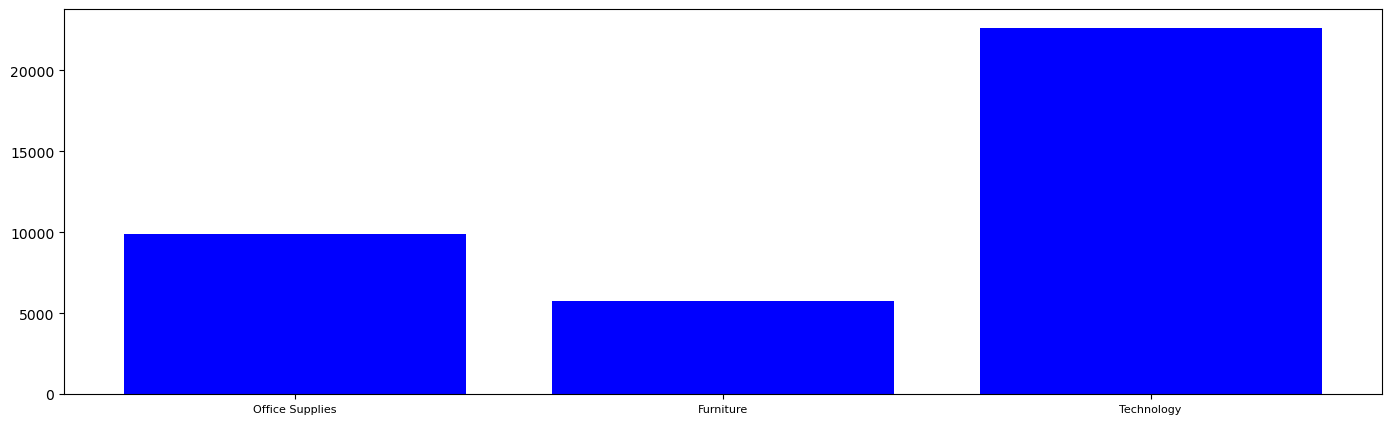

In [170]:
plt.figure(figsize=(17, 5))
plt.bar(data['category'],data['sales'],color = 'b')
plt.xticks(size=8)
plt.show()

<label id="14">Total sales values by category and subcategory</label>

In [176]:
data.groupby(["category", "sub_category"]).agg({"sales":"sum"})     

sales
category        sub_category              
Furniture       Bookcases     1.466572e+06
                Chairs        1.501682e+06
                Furnishings   3.855783e+05
                Tables        7.570419e+05
Office Supplies Appliances    1.011064e+06
                Art           3.720920e+05
                Binders       4.619115e+05
                Envelopes     1.709043e+05
                Fasteners     8.324232e+04
                Labels        7.340403e+04
                Paper         2.442917e+05
                Storage       1.127086e+06
                Supplies      2.430742e+05
Technology      Accessories   7.492370e+05
                Copiers       1.509436e+06
                Machines      7.790601e+05
                Phones        1.706824e+06

<label id="15">Which are the most selling products in subcategory?</label>

In [177]:
data.groupby(["category", "sub_category"], as_index=False).agg({"quantity":"count"})

,category,sub_category,quantity
0,Furniture,Bookcases,2411
1,Furniture,Chairs,3434
2,Furniture,Furnishings,3170
3,Furniture,Tables,861
4,Office Supplies,Appliances,1755
5,Office Supplies,Art,4883
6,Office Supplies,Binders,6152
7,Office Supplies,Envelopes,2435
8,Office Supplies,Fasteners,2420
9,Office Supplies,Labels,2606


<label id="16">Which customer segments are the most profitable?</label>

In [181]:
profitable_segment = pd.DataFrame(data.groupby(['segment']).agg({"profit":"sum"}))
profitable_segment.sort_values(by=['profit'], inplace = True, ascending = False)
profitable_segment

,profit
segment,
Consumer,749239.78206
Corporate,442785.85866
Home Office,277009.18056


([0, 1, 2],
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

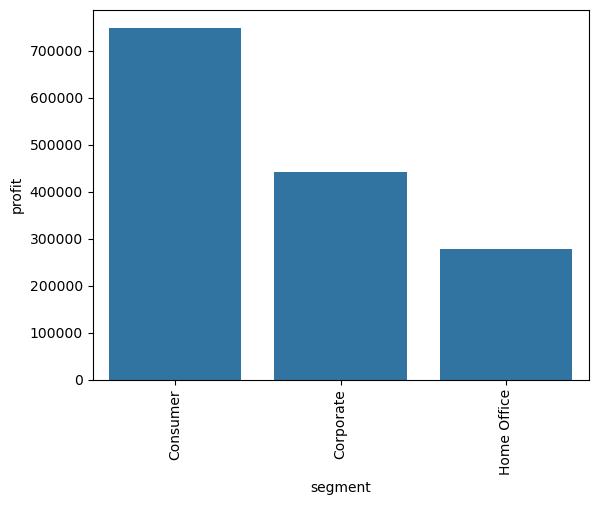

In [182]:
sns.barplot(x='segment',y='profit',data=profitable_segment.reset_index())
plt.xticks(rotation = 'vertical')

In [186]:
profit_cate_year = data.groupby(["category", "year"]).agg({"profit":"sum"}).sort_values("profit", ascending=True)
profit_cate_year

profit
category        year              
Furniture       2011   53696.92640
                2012   58132.83400
                2013   85640.43050
Office Supplies 2011   85996.53430
Furniture       2014   89312.06290
Office Supplies 2012  103305.50780
Technology      2011  109247.35084
                2012  145976.93730
Office Supplies 2013  149245.73580
Technology      2013  173626.59388
Office Supplies 2014  179926.05640
Technology      2014  234927.85116

<Axes: xlabel='year', ylabel='profit'>

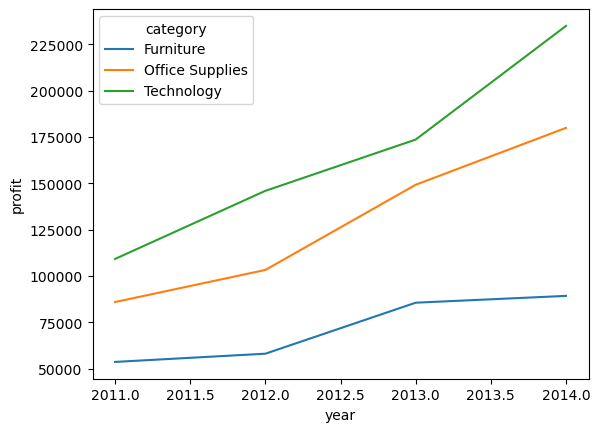

In [191]:
sns.lineplot(data=profit_cate_year, x="year", y="profit", hue="category")

d:\Anaconda3_setup\envs\projects_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


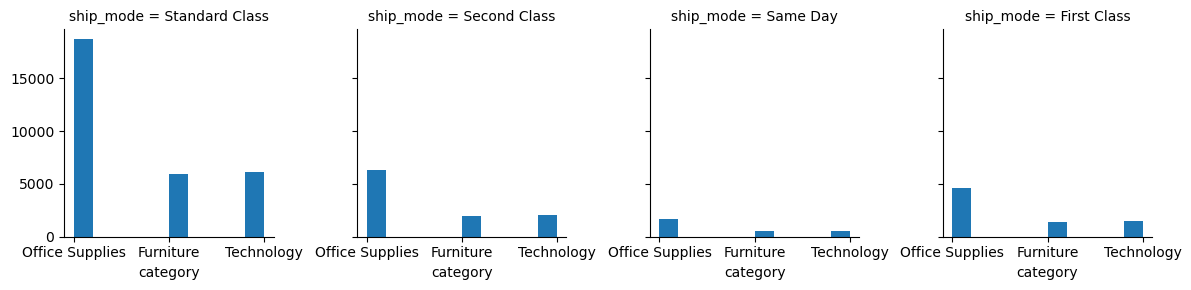

In [192]:
category_hist = sns.FacetGrid(data, col='ship_mode', palette='rainbow')
category_hist.map(plt.hist, 'category')

<label id="17">What market sold the most products?</label>

C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_8180\3904645005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='market',data=data, palette='rainbow')


<Axes: xlabel='market', ylabel='count'>

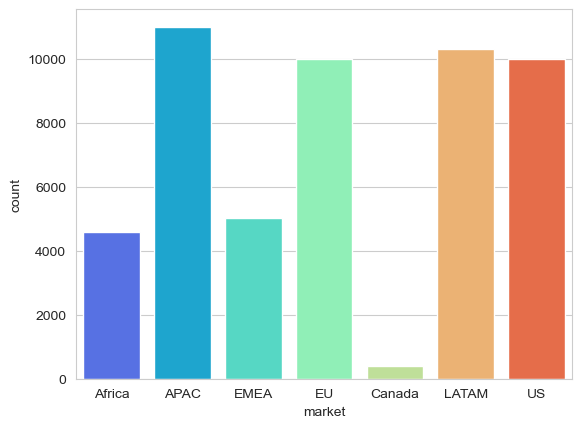

In [194]:
sns.set_style('whitegrid')
sns.countplot(x='market',data=data, palette='rainbow')

<label id="18">Which are the Top 10 country by sales?</label>

In [195]:
countries = pd.DataFrame(data.groupby('country').agg({"sales":"sum"}))
countries.sort_values('sales',inplace=True, ascending=False)
countries.head(10)

,sales
country,
United States,2.297201e+06
Australia,9.252359e+05
France,8.589311e+05
China,7.005620e+05
Germany,6.288400e+05
Mexico,6.225906e+05
India,5.896501e+05
United Kingdom,5.285763e+05
Indonesia,4.048875e+05


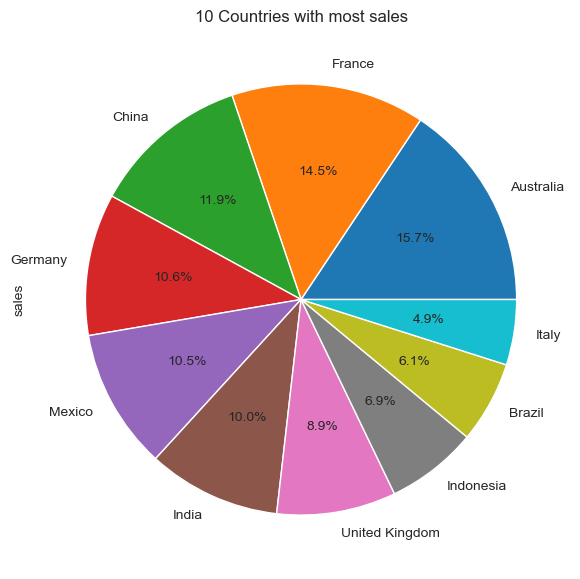

In [196]:
countries = countries.sort_values(by = 'sales',ascending = False)[1:11]
countries['sales'].plot(kind='pie',autopct='%1.1f%%',figsize=(14,7))
plt.title('10 Countries with most sales')
plt.show()